In [1]:
import imp
import ppsim as pp
imp.reload(pp)
from dataclasses import dataclass
import dataclasses
import numpy as np
from matplotlib import pyplot as plt
import pickle
import numpy as np

import ipywidgets as widgets

# CRN (chemical reaction network) notation for specifying protocols



In [2]:
# CRN for approximate majority
k1,k2,k3 = 2, 1, 0.9
a,b,u = pp.species('A B U')
approx_majority = [
    (a+b >> 2*u).k(k1),
    (a+u >> 2*a).k(k2),
    (b+u >> 2*b).k(k3),
]

 Time: 30.000


Text(0.5, 1.0, 'approximate majority protocol')

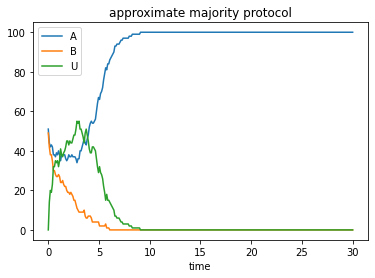

In [8]:
n = 10 ** 2
p = 0.51
init_config = {a: p*n, b: (1-p)*n}
sim = pp.Simulation(init_config, approx_majority)
sim.run(30, 0.1)
sim.history.plot(figsize = (6,4))
plt.title('approximate majority protocol')
# plt.xlim(0, sim.times[-1])
# plt.ylim(0, n)

In [43]:
print(sim.reactions)

A, B  -->  U, U
A, U  -->  A, A      with probability 0.5
B, U  -->  B, B      with probability 0.45


In [35]:
sim.steps_per_time_unit
# sim.history

1113.5272611375

In [9]:
import gillespy2
class ApproximateMajority(gillespy2.Model):
     def __init__(self, n):
            #initialize Model
            gillespy2.Model.__init__(self, name="Approximate_Majority")
            
            self.volume = n
            
            rate1 = gillespy2.Parameter(name='rate1', expression= k1)
            rate2 = gillespy2.Parameter(name='rate2', expression= k2)
            rate3 = gillespy2.Parameter(name='rate3', expression = k3)
            
            # Add parameters to the model
            self.add_parameter([rate1,rate2,rate3])
            
            A = gillespy2.Species(name='A', initial_value= p * n)
            B = gillespy2.Species(name='B', initial_value= (1-p) * n)
            U = gillespy2.Species(name='U', initial_value=0)
            
            # Add species to the model
            self.add_species([A, B, U])
            
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={U:2},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1, U:1}, products={A:2},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={B:1, U:1}, products={B:2},
                    rate=rate3)
            
            # Add reactions to the model
            self.add_reaction([r1,r2,r3])
            
            # Set timespan of model
            self.timespan(np.linspace(0,30,300))

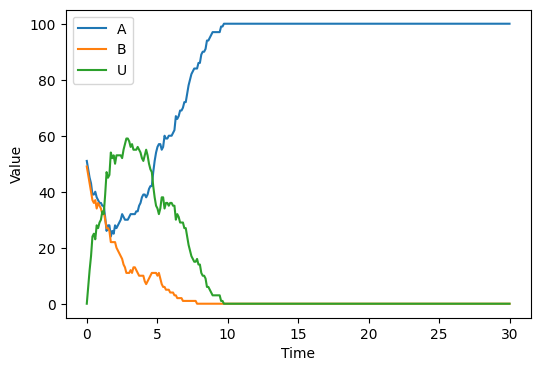

In [11]:
model = ApproximateMajority(n)
model.run().plot(figsize = (6, 4))

In [27]:
n = 20
p = 0.5
init_config = {a: p * n, b: (1-p)*n}
trials = 10000
end_time = 5
sim = pp.Simulation(init_config, approx_majority)
df = sim.sample_future_configuration(end_time, num_samples = trials)

model = ApproximateMajority(n)
model.timespan(np.linspace(0,end_time,2))
results = model.run(number_of_trajectories = trials)

  0%|          | 0/10000 [00:00<?, ?it/s]

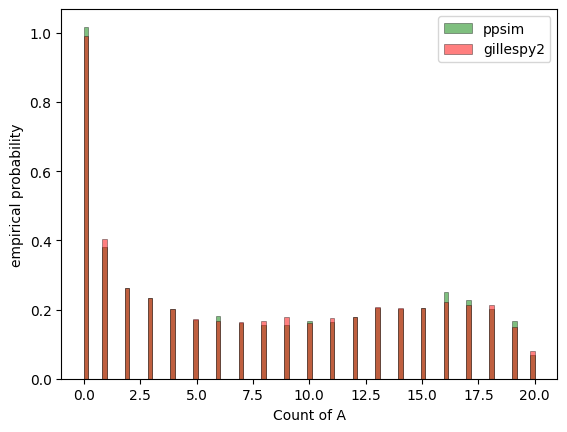

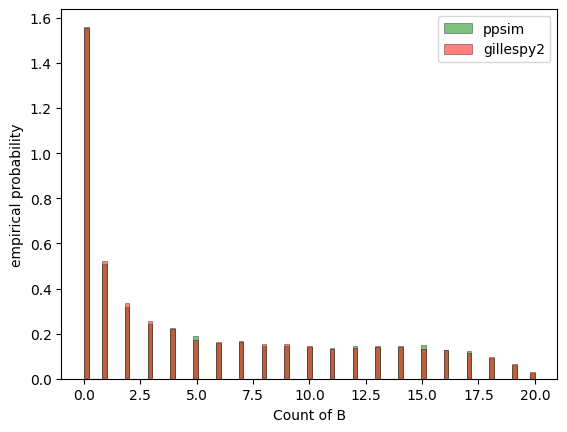

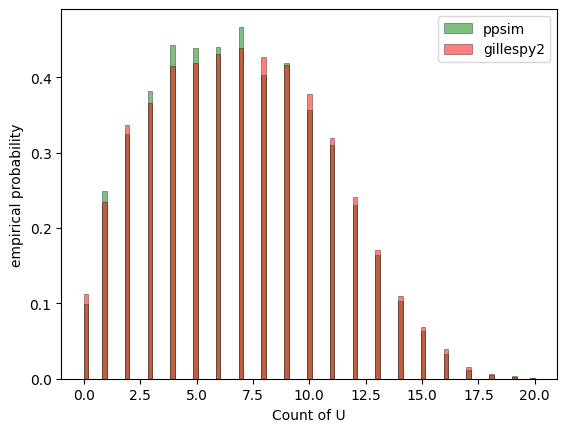

In [28]:
for state in ['A', 'B', 'U']:
    plt.hist(df[state], bins = np.linspace(0, n, 100), alpha = 0.5, label='ppsim', density=True, edgecolor = 'k', linewidth=0.5, color='g')
    plt.hist([result[state][1] for result in results], bins = np.linspace(0, n, 100), alpha = 0.5, label='gillespy2', density=True, color='r', edgecolor = 'k', linewidth=0.5)
    plt.legend()
    plt.xlabel(f'Count of {state}')
    plt.ylabel('empirical probability')
    plt.show()

In [8]:
results = model.run(number_of_trajectories = 1000)

In [15]:
[result['A'][1] for result in results]

[49.0,
 54.0,
 55.0,
 63.0,
 89.0,
 80.0,
 98.0,
 4.0,
 33.0,
 76.0,
 29.0,
 89.0,
 63.0,
 91.0,
 32.0,
 44.0,
 24.0,
 82.0,
 0.0,
 34.0,
 87.0,
 87.0,
 90.0,
 64.0,
 7.0,
 3.0,
 53.0,
 11.0,
 45.0,
 5.0,
 47.0,
 68.0,
 13.0,
 66.0,
 43.0,
 34.0,
 64.0,
 18.0,
 56.0,
 67.0,
 53.0,
 87.0,
 67.0,
 1.0,
 19.0,
 43.0,
 1.0,
 89.0,
 9.0,
 5.0,
 0.0,
 67.0,
 46.0,
 0.0,
 96.0,
 21.0,
 16.0,
 46.0,
 22.0,
 98.0,
 18.0,
 40.0,
 38.0,
 59.0,
 87.0,
 78.0,
 53.0,
 72.0,
 1.0,
 86.0,
 68.0,
 0.0,
 79.0,
 2.0,
 8.0,
 69.0,
 1.0,
 95.0,
 54.0,
 0.0,
 1.0,
 26.0,
 34.0,
 88.0,
 0.0,
 7.0,
 80.0,
 12.0,
 13.0,
 90.0,
 7.0,
 4.0,
 99.0,
 18.0,
 30.0,
 85.0,
 91.0,
 3.0,
 44.0,
 65.0,
 86.0,
 5.0,
 68.0,
 1.0,
 11.0,
 74.0,
 37.0,
 5.0,
 83.0,
 1.0,
 4.0,
 17.0,
 57.0,
 16.0,
 5.0,
 90.0,
 2.0,
 1.0,
 42.0,
 4.0,
 78.0,
 9.0,
 96.0,
 60.0,
 94.0,
 22.0,
 27.0,
 51.0,
 18.0,
 4.0,
 2.0,
 51.0,
 3.0,
 82.0,
 34.0,
 2.0,
 16.0,
 4.0,
 76.0,
 39.0,
 27.0,
 45.0,
 87.0,
 5.0,
 64.0,
 32.0,
 2.0,
 58.0,
 17.

In [43]:
import time
ns = [int(n) for n in np.geomspace(100, 10 ** 5, 10)]
gillespy_times = []
ppsim_times = []
num_trials = 1000
for n in ns:
    model = ApproximateMajority(n)
    model.timespan(np.linspace(0,10,2))
    start_time = time.perf_counter()
    r = model.run(number_of_trajectories = num_trials)
    gillespy_times.append((time.perf_counter() - start_time) / num_trials)
#     print(gillespy_times)
    sim = pp.Simulation({a: n // 2, b: n // 2}, approx_majority)
    start_time = time.perf_counter()
    c = sim.sample_future_configuration(10, num_trials)
    ppsim_times.append((time.perf_counter() - start_time) / num_trials)
#     print(ppsim_times)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

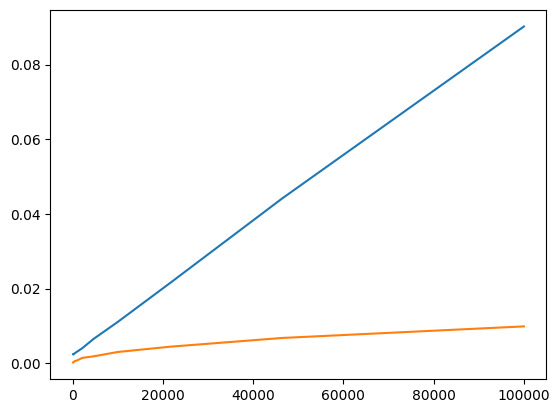

In [47]:
plt.plot(ns, gillespy_times)
plt.plot(ns, ppsim_times)
# plt.xscale('log')
# plt.yscale('log')
plt.show()